# Calculate ice flux from bed topo, elevation, and velocity time series

In [48]:
import os
import glob
import matplotlib.pyplot as plt
import xarray as xr
import rioxarray as rxr
import numpy as np
import datetime
from tqdm.auto import tqdm
import xesmf as xe
from matplotlib.patches import Rectangle
import pandas as pd
import geopandas as gpd
from shapely import wkt
import seaborn as sns

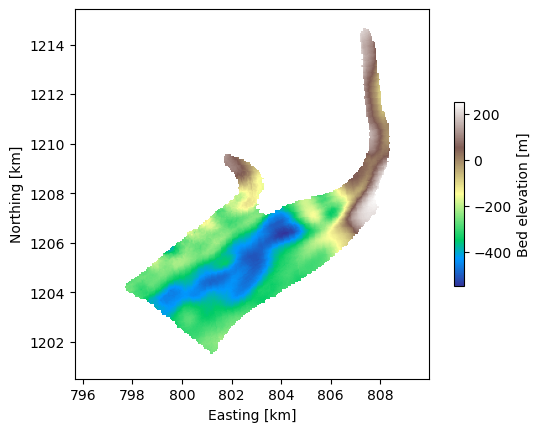

In [3]:
# -----Define path to data
data_path = '/Users/raineyaberle/Research/PhD/Hubbard/'
figures_out_path = os.path.join(data_path, 'figures')

# -----Load coregistered surface elevation and ICESat-2 file names
h_fns = sorted(glob.glob(os.path.join(data_path, 'surface_elevation', 'coregistered', '*.tif')))
is2_fns = sorted(glob.glob(os.path.join(data_path, 'surface_elevation', 'ICESat-2', 'rasters', '*.tif')))

# -----Load bed topography
bed_fn = os.path.join(data_path, 'bed_topo', 'hubbard_mc_idw_bedElev.tif')
bed = rxr.open_rasterio(bed_fn)
bed = bed.rio.reproject('EPSG:3338')
bed = xr.where((bed > 3e38) | (bed < -3e38), np.nan, bed)
bed = bed.rio.write_crs('EPSG:3338')
# Plot
plt.imshow(bed.data[0], cmap='terrain',
           extent=(np.min(bed.x.data)/1e3, np.max(bed.x.data)/1e3, 
                   np.min(bed.y.data)/1e3, np.max(bed.y.data)/1e3))
plt.xlabel('Easting [km]')
plt.ylabel('Northing [km]')
plt.colorbar(shrink=0.5, label='Bed elevation [m]')
plt.show()

  0%|          | 0/142 [00:00<?, ?it/s]

2012-05-24 00:00:00 OIB


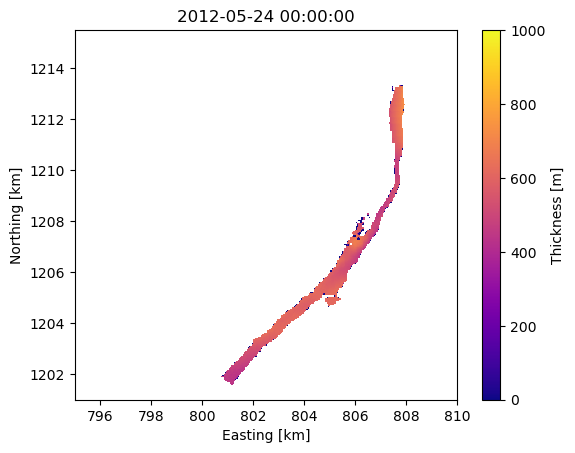

2013-05-21 00:00:00 OIB


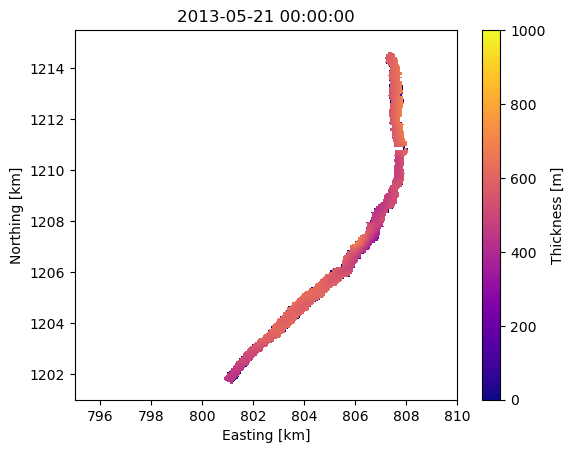

2012-03-21 00:00:00 OIB


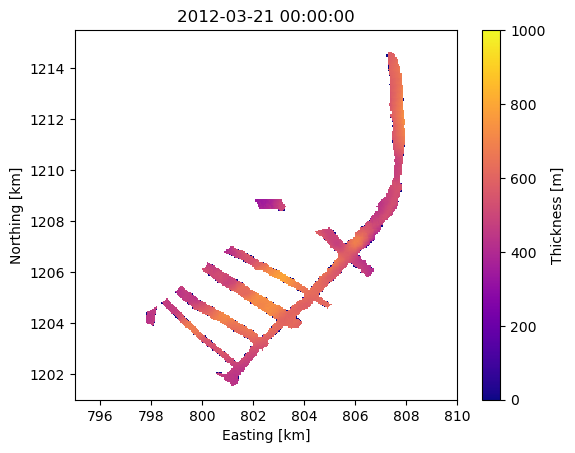

2014-05-17 00:00:00 OIB


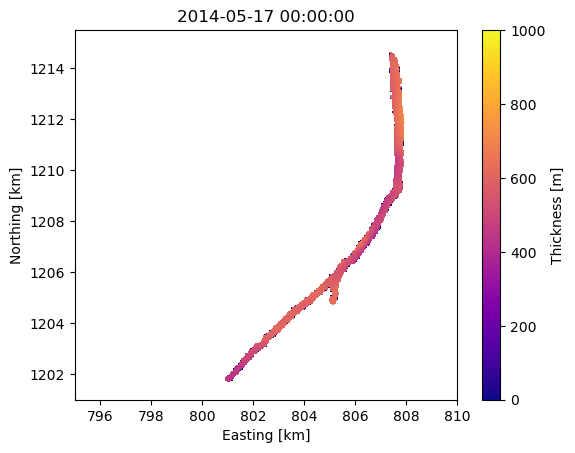

2015-05-19 00:00:00 OIB


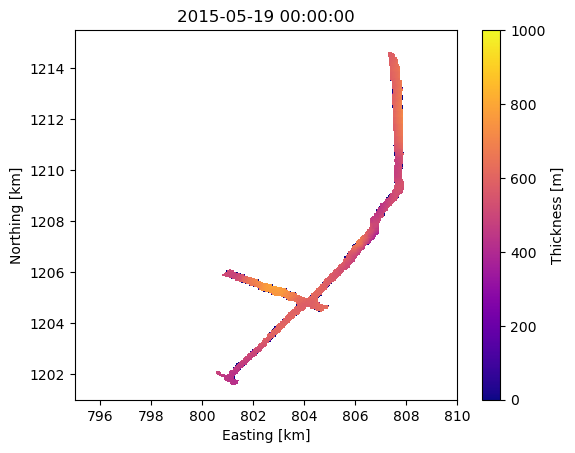

2016-05-15 00:00:00 OIB


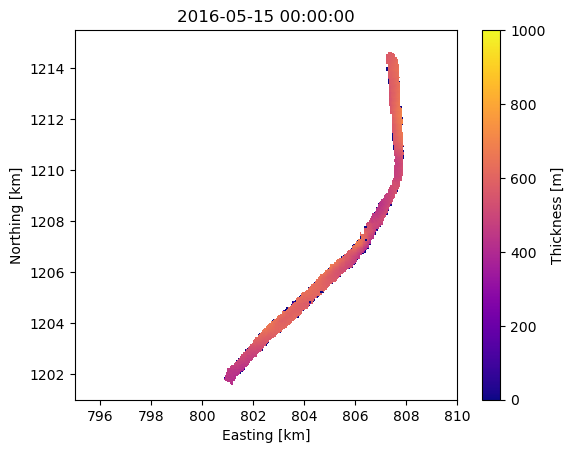

2018-05-23 00:00:00 OIB


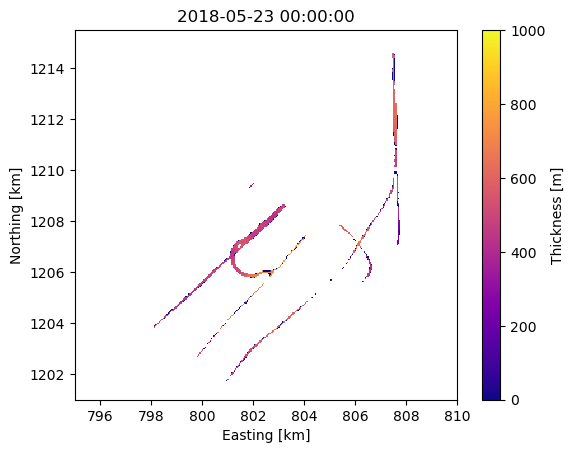

2019-09-28 00:00:00 OIB


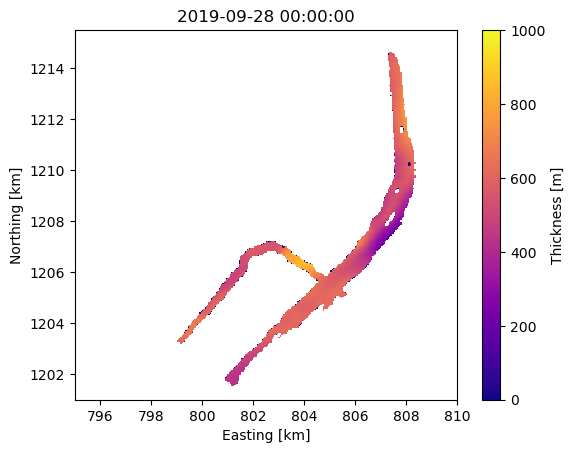

2020-06-05 00:00:00 OIB


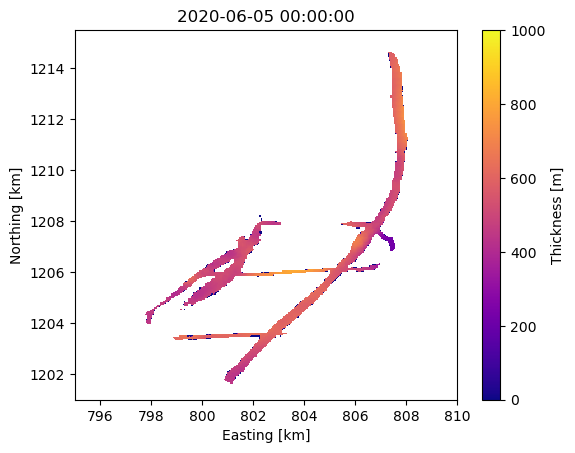

2009-02-22 00:00:00 ArcticDEM


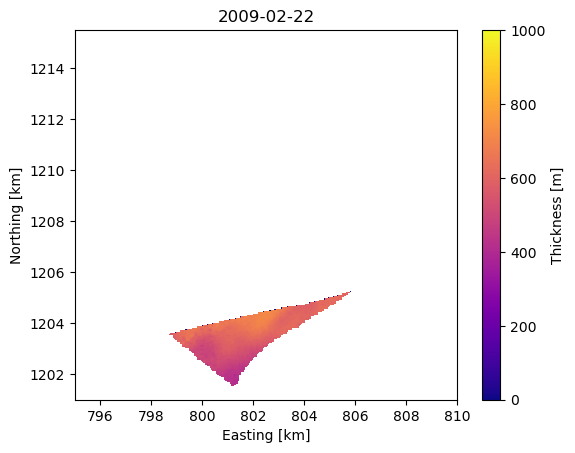

2009-02-22 00:00:00 ArcticDEM


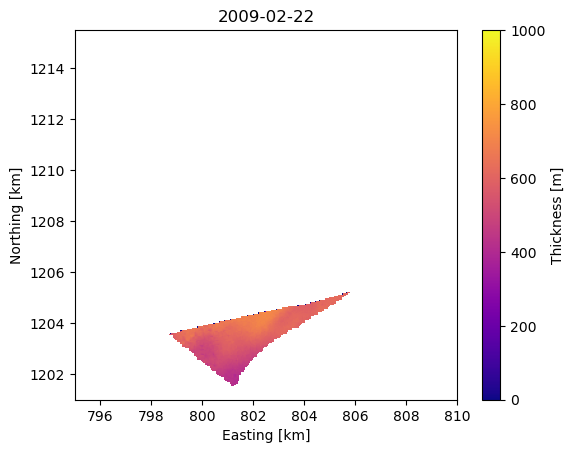

2010-08-26 00:00:00 ArcticDEM


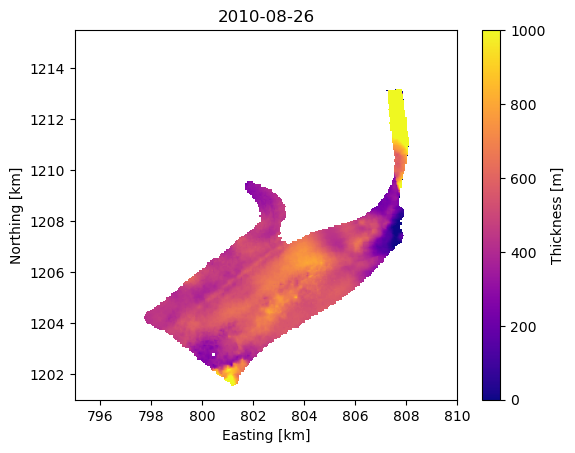

2011-07-06 00:00:00 ArcticDEM


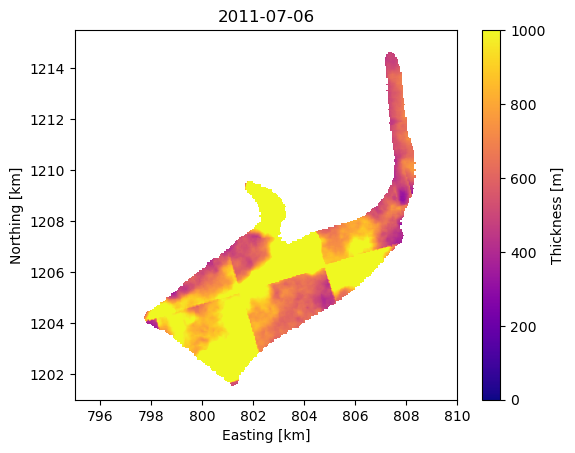

2011-07-11 00:00:00 ArcticDEM


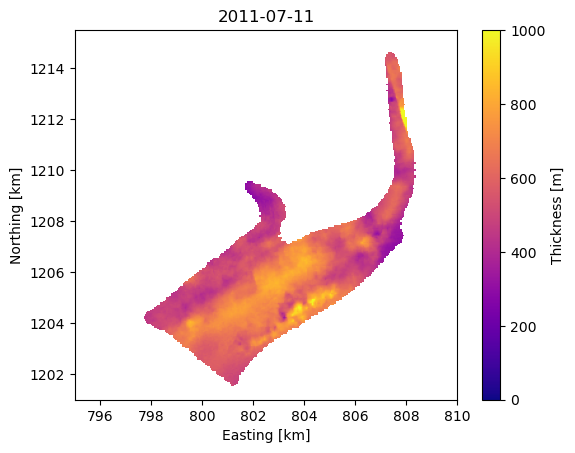

2011-09-25 00:00:00 ArcticDEM
No data values over bed, skipping...
2011-10-04 00:00:00 ArcticDEM


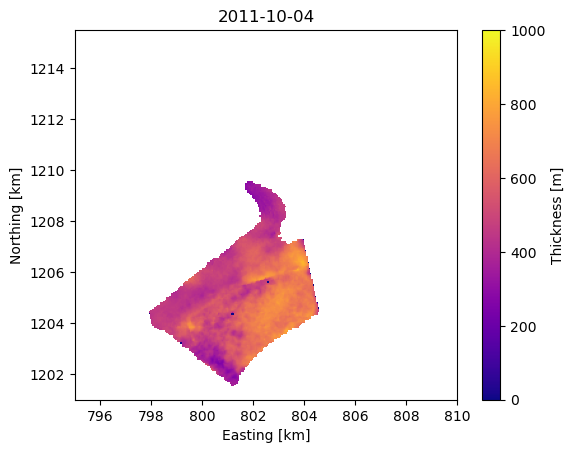

2018-09-04 00:00:00 ArcticDEM


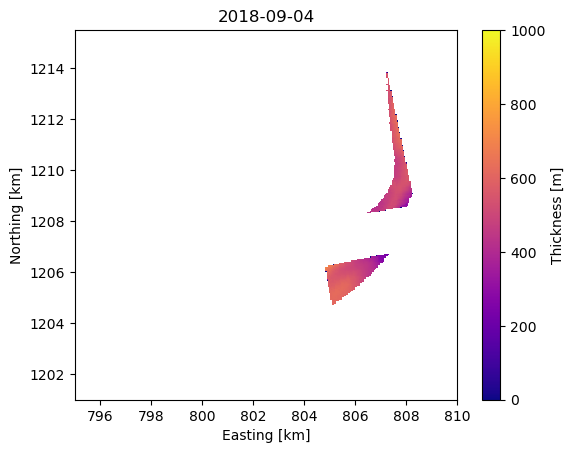

2021-03-05 00:00:00 ArcticDEM
No data values over bed, skipping...
2013-05-22 00:00:00 ArcticDEM


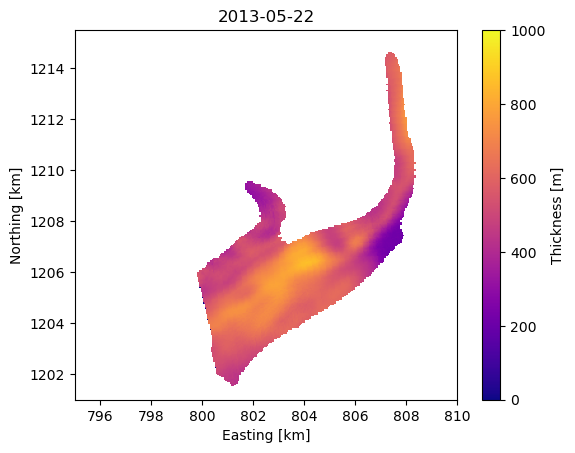

2013-06-25 00:00:00 ArcticDEM


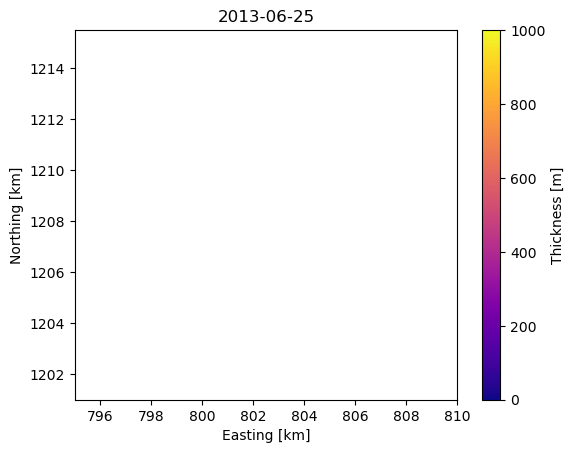

2013-08-10 00:00:00 ArcticDEM


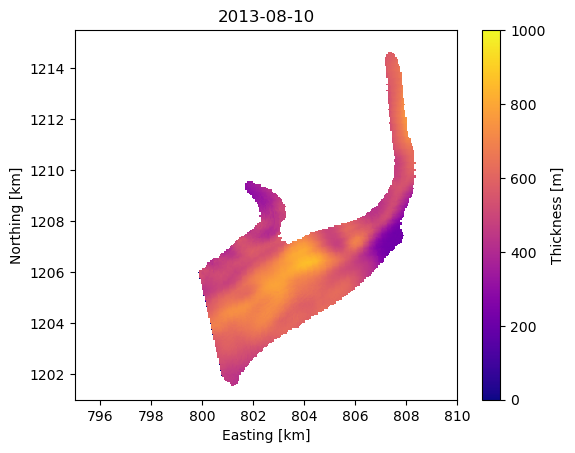

2013-12-07 00:00:00 ArcticDEM


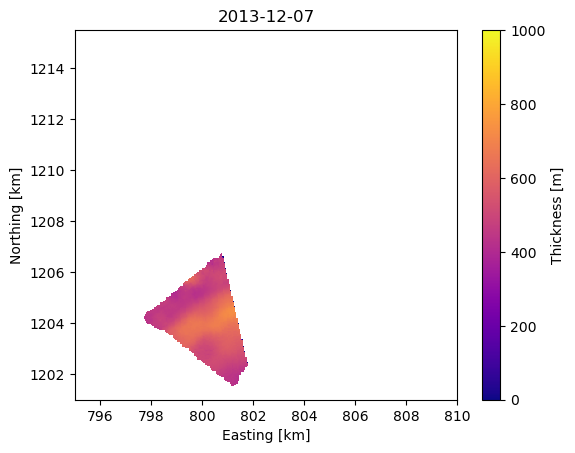

2014-04-23 00:00:00 ArcticDEM
No data values over bed, skipping...
2014-11-11 00:00:00 ArcticDEM


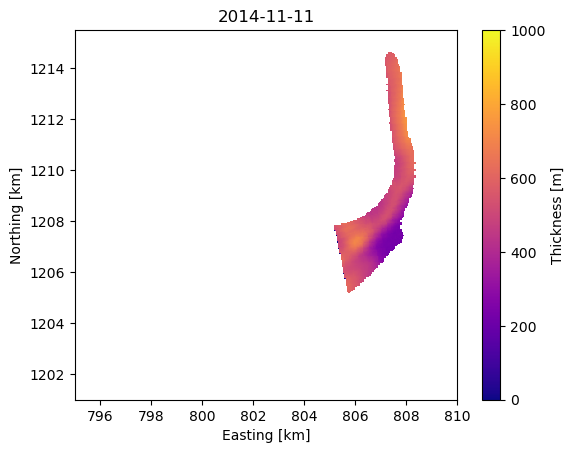

2014-11-20 00:00:00 ArcticDEM
No data values over bed, skipping...
2015-10-31 00:00:00 ArcticDEM


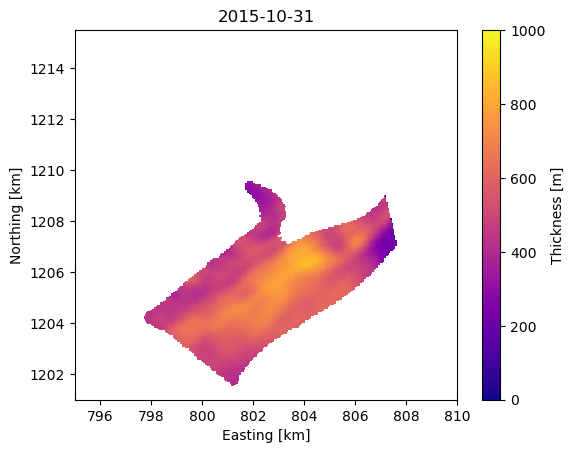

2016-03-22 00:00:00 ArcticDEM
No data values over bed, skipping...
2016-11-21 00:00:00 ArcticDEM


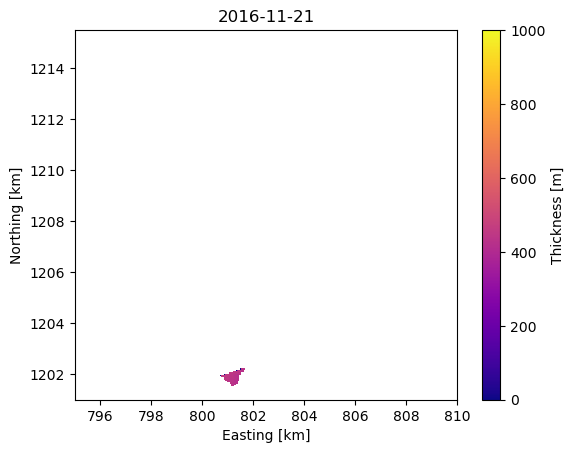

2017-01-29 00:00:00 ArcticDEM


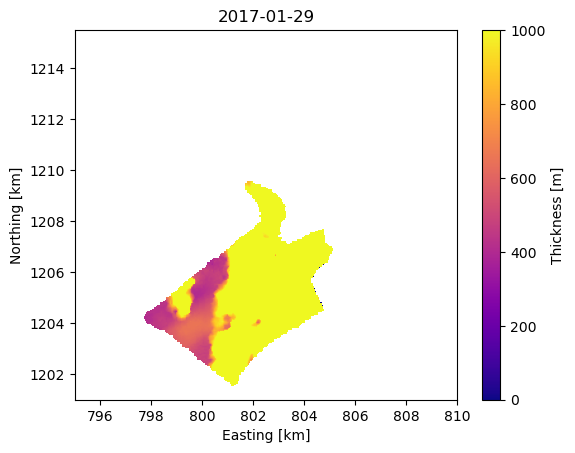

2017-05-10 00:00:00 ArcticDEM


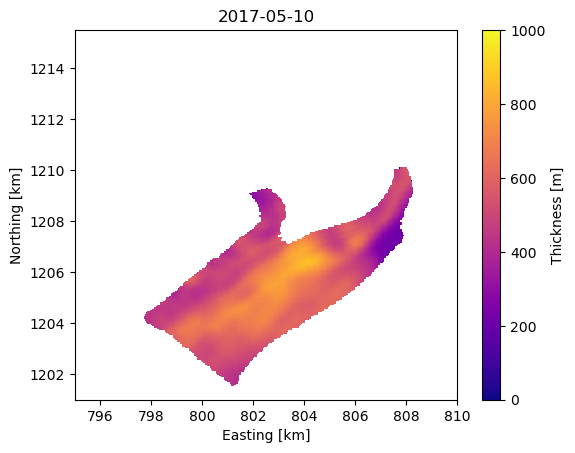

2018-01-30 00:00:00 ArcticDEM


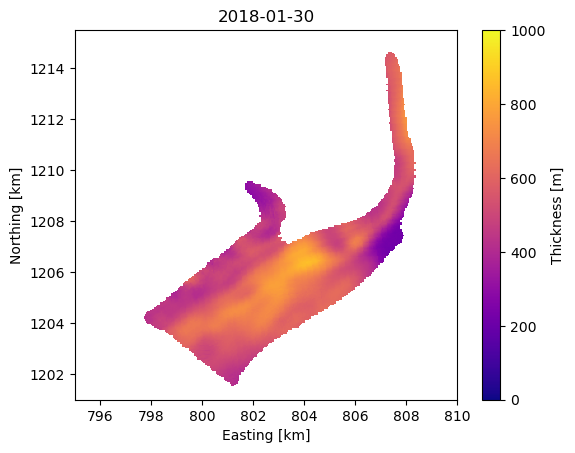

2018-05-07 00:00:00 ArcticDEM
No data values over bed, skipping...
2019-01-05 00:00:00 ArcticDEM


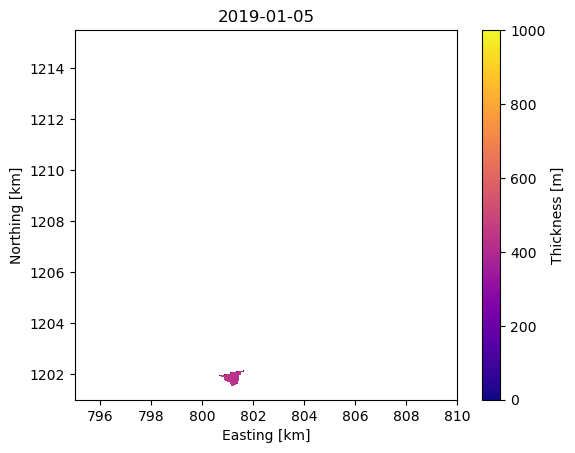

2019-06-20 00:00:00 ArcticDEM


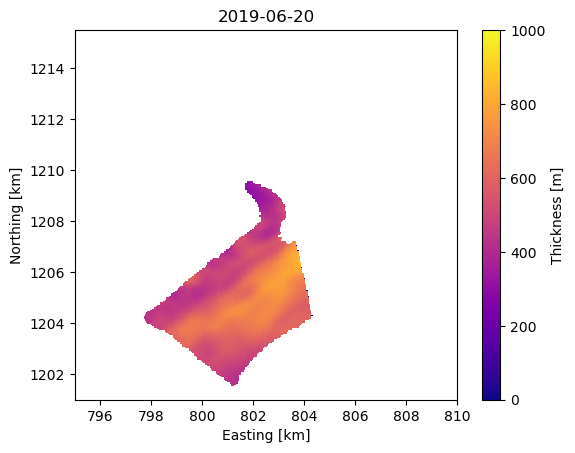

2020-05-27 00:00:00 ArcticDEM


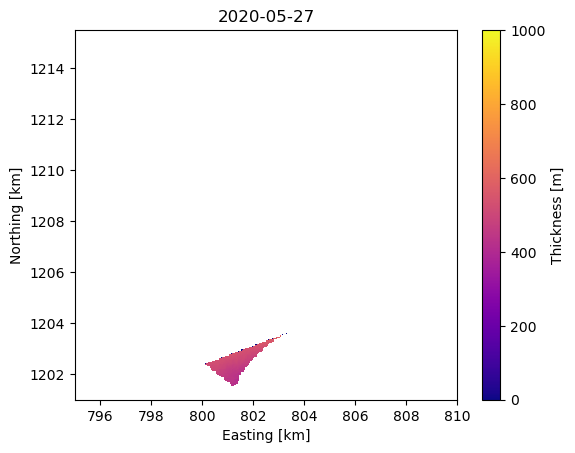

2020-05-30 00:00:00 ArcticDEM


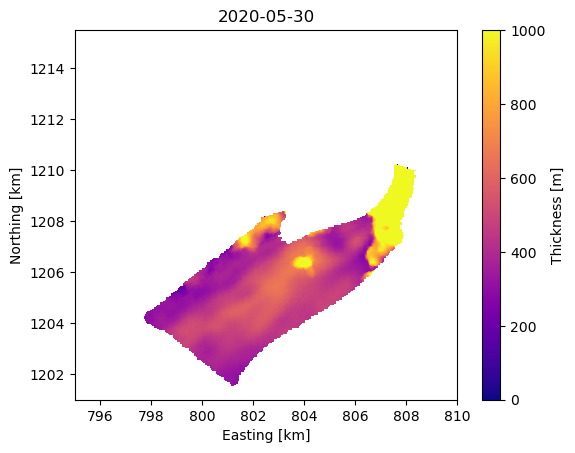

2020-06-04 00:00:00 ArcticDEM
No data values over bed, skipping...
2020-09-05 00:00:00 ArcticDEM


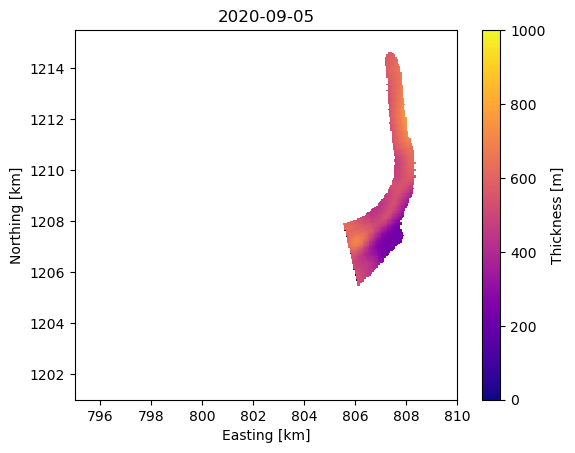

2021-02-23 00:00:00 ArcticDEM
No data values over bed, skipping...
2022-04-29 00:00:00 ArcticDEM


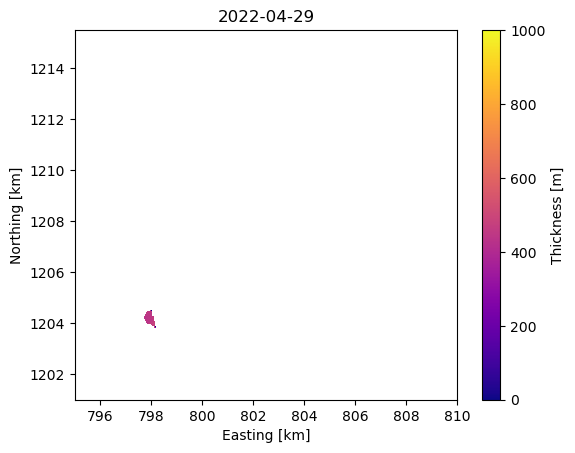

2013-06-16 00:00:00 ArcticDEM


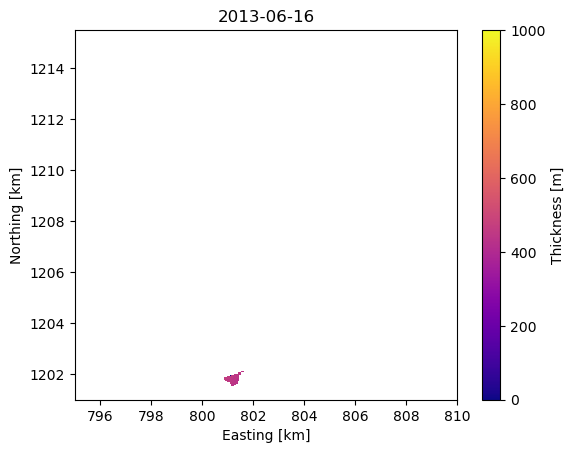

2014-03-07 00:00:00 ArcticDEM
No data values over bed, skipping...
2014-11-14 00:00:00 ArcticDEM
No data values over bed, skipping...
2015-08-29 00:00:00 ArcticDEM


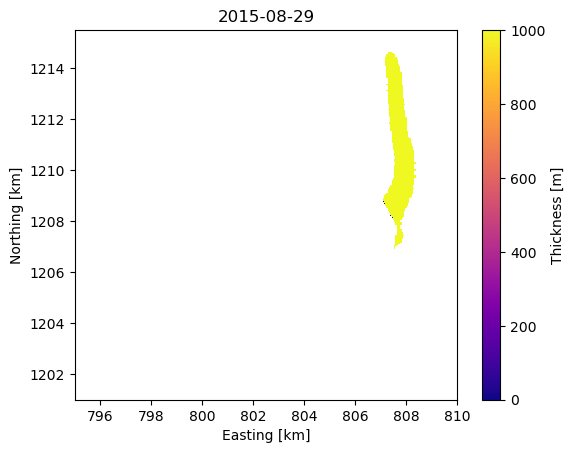

2016-05-10 00:00:00 ArcticDEM


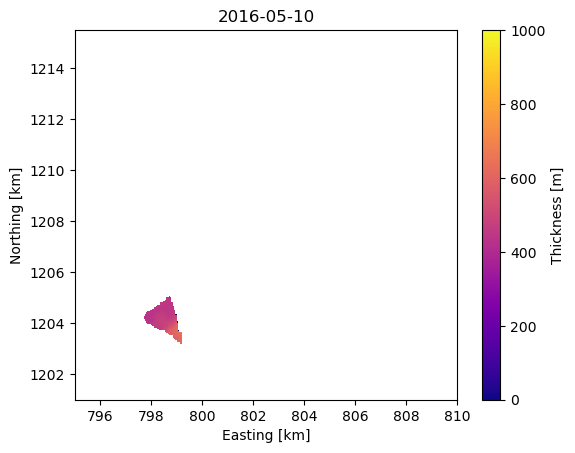

2016-07-17 00:00:00 ArcticDEM
No data values over bed, skipping...
2016-09-17 00:00:00 ArcticDEM


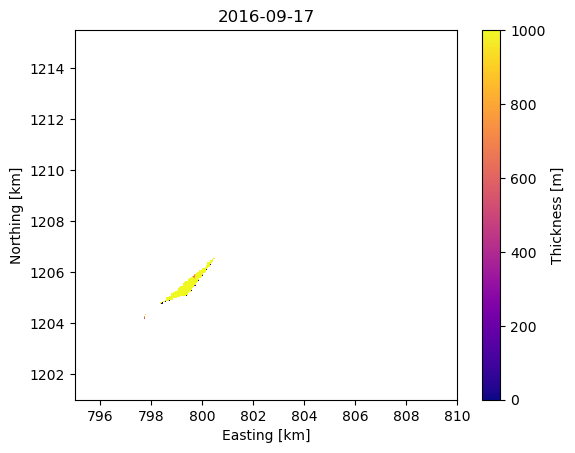

2016-12-31 00:00:00 ArcticDEM
No data values over bed, skipping...
2017-01-17 00:00:00 ArcticDEM


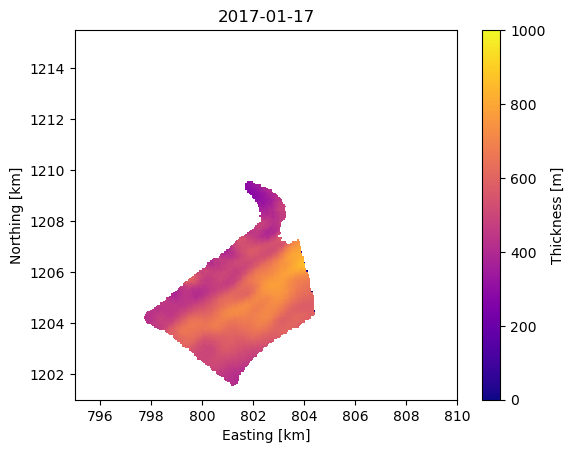

2018-01-17 00:00:00 ArcticDEM


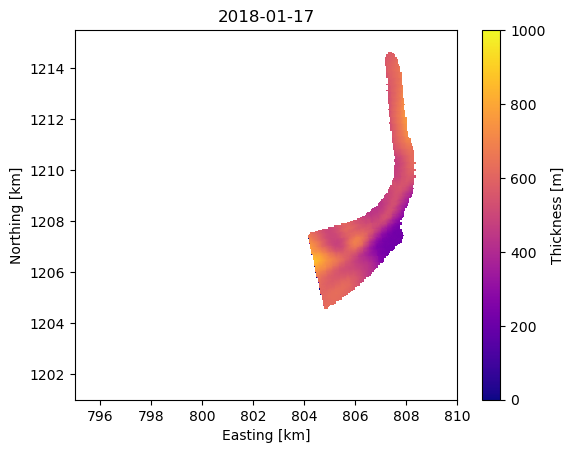

2018-01-28 00:00:00 ArcticDEM
No data values over bed, skipping...
2018-11-23 00:00:00 ArcticDEM


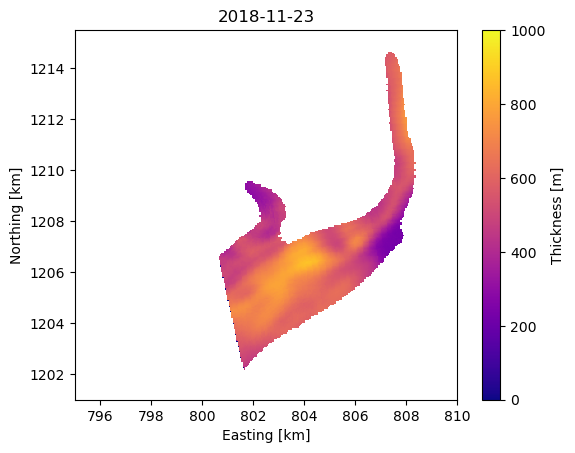

2019-01-17 00:00:00 ArcticDEM
No data values over bed, skipping...
2019-05-03 00:00:00 ArcticDEM


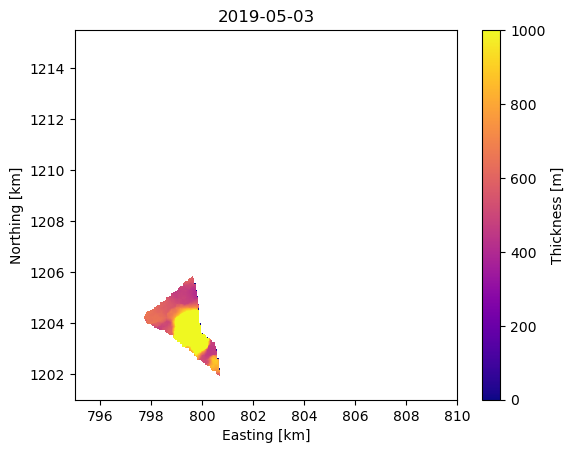

2019-09-05 00:00:00 ArcticDEM


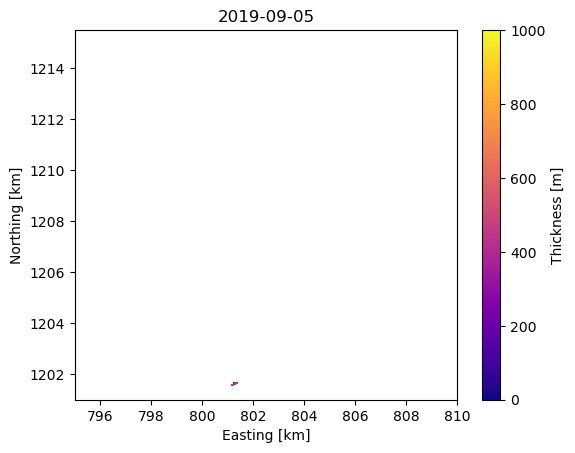

2020-11-18 00:00:00 ArcticDEM


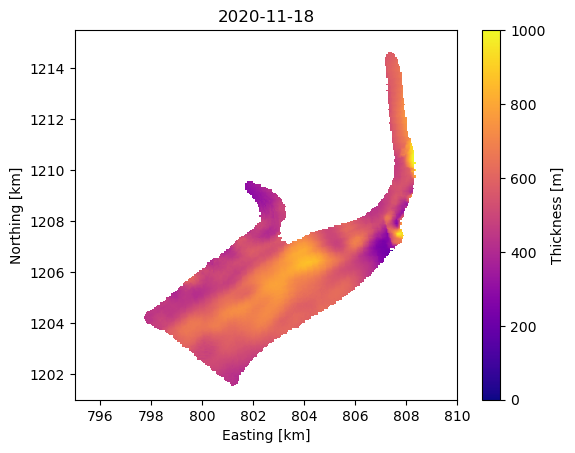

2021-02-15 00:00:00 ArcticDEM


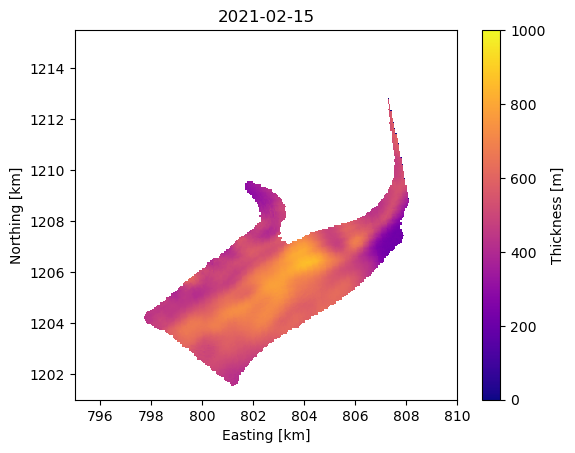

2022-06-03 00:00:00 ArcticDEM
No data values over bed, skipping...
2018-10-11 00:00:00 ArcticDEM
No data values over bed, skipping...
2018-11-30 00:00:00 ArcticDEM
No data values over bed, skipping...
2020-05-04 00:00:00 ArcticDEM
No data values over bed, skipping...
2021-02-08 00:00:00 ArcticDEM


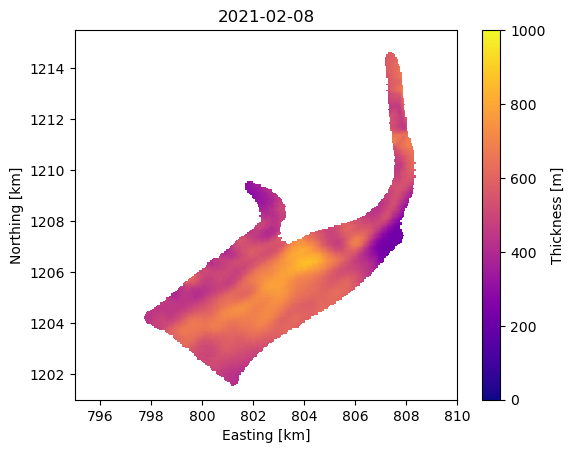

2021-07-17 00:00:00 ArcticDEM
No data values over bed, skipping...
2021-08-29 00:00:00 ArcticDEM
No data values over bed, skipping...
2021-10-25 00:00:00 ArcticDEM
No data values over bed, skipping...
2022-02-23 00:00:00 ArcticDEM
No data values over bed, skipping...
2022-03-26 00:00:00 ArcticDEM
No data values over bed, skipping...
2022-04-14 00:00:00 ArcticDEM
No data values over bed, skipping...
2022-04-16 00:00:00 ArcticDEM
No data values over bed, skipping...
2022-04-21 00:00:00 ArcticDEM
No data values over bed, skipping...
2022-05-05 00:00:00 ArcticDEM
No data values over bed, skipping...
2022-05-22 00:00:00 ArcticDEM
No data values over bed, skipping...
2022-05-29 00:00:00 ArcticDEM
No data values over bed, skipping...
2022-06-17 00:00:00 ArcticDEM
No data values over bed, skipping...
2022-06-29 00:00:00 ArcticDEM
No data values over bed, skipping...
2022-07-04 00:00:00 ArcticDEM
No data values over bed, skipping...
2022-08-11 00:00:00 ArcticDEM
No data values over bed, skippin

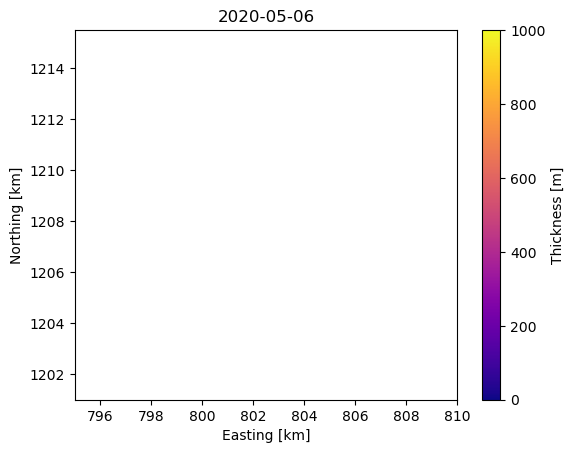

2020-07-07 00:00:00 ICESat-2
No data values over bed, skipping...
2020-08-05 00:00:00 ICESat-2
No data values over bed, skipping...
2020-09-05 00:00:00 ICESat-2
No data values over bed, skipping...
2020-10-04 00:00:00 ICESat-2
No data values over bed, skipping...
2020-10-06 00:00:00 ICESat-2
No data values over bed, skipping...
2020-11-02 00:00:00 ICESat-2
No data values over bed, skipping...
2020-12-05 00:00:00 ICESat-2
No data values over bed, skipping...
2021-01-03 00:00:00 ICESat-2
No data values over bed, skipping...
2021-03-03 00:00:00 ICESat-2
No data values over bed, skipping...
2021-03-06 00:00:00 ICESat-2
No data values over bed, skipping...
2021-04-04 00:00:00 ICESat-2


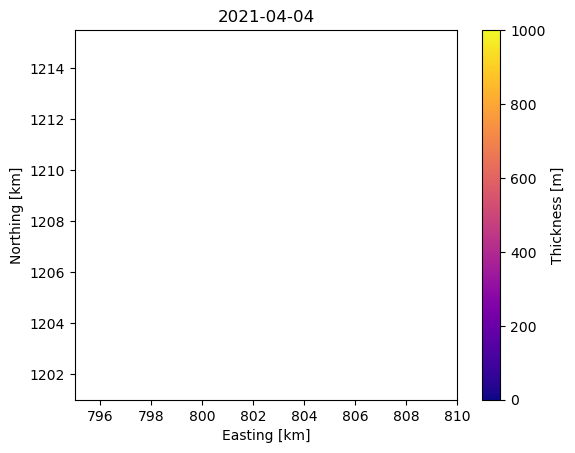

2021-06-05 00:00:00 ICESat-2
No data values over bed, skipping...
2021-07-05 00:00:00 ICESat-2
No data values over bed, skipping...
2021-09-05 00:00:00 ICESat-2
No data values over bed, skipping...
2021-10-04 00:00:00 ICESat-2
No data values over bed, skipping...
2021-11-04 00:00:00 ICESat-2
No data values over bed, skipping...
2021-12-05 00:00:00 ICESat-2
No data values over bed, skipping...
2022-01-03 00:00:00 ICESat-2
No data values over bed, skipping...
2022-01-30 00:00:00 ICESat-2
No data values over bed, skipping...
2022-02-01 00:00:00 ICESat-2
No data values over bed, skipping...
2022-03-04 00:00:00 ICESat-2
No data values over bed, skipping...
2022-06-03 00:00:00 ICESat-2
No data values over bed, skipping...
2022-07-02 00:00:00 ICESat-2


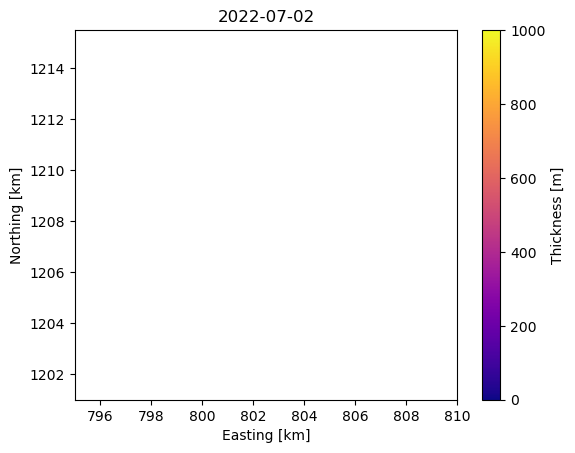

2022-07-03 00:00:00 ICESat-2
No data values over bed, skipping...
2022-10-30 00:00:00 ICESat-2
No data values over bed, skipping...
2022-10-31 00:00:00 ICESat-2
No data values over bed, skipping...
2022-11-29 00:00:00 ICESat-2
No data values over bed, skipping...
2022-12-02 00:00:00 ICESat-2
No data values over bed, skipping...
2022-12-03 00:00:00 ICESat-2
No data values over bed, skipping...
2023-01-30 00:00:00 ICESat-2
No data values over bed, skipping...
2023-03-02 00:00:00 ICESat-2
No data values over bed, skipping...
2023-03-04 00:00:00 ICESat-2
No data values over bed, skipping...
2023-04-02 00:00:00 ICESat-2
No data values over bed, skipping...
2023-05-01 00:00:00 ICESat-2
No data values over bed, skipping...
2023-06-01 00:00:00 ICESat-2
No data values over bed, skipping...
2023-06-03 00:00:00 ICESat-2
No data values over bed, skipping...
2023-06-30 00:00:00 ICESat-2
No data values over bed, skipping...
2023-07-02 00:00:00 ICESat-2
No data values over bed, skipping...
2023-07-29

In [13]:
# -----Define function for reprojecting and regridding to bed topography grid
def reproject_regrid(da, ref_da):
    da = da.rio.reproject(ref_da.rio.crs)
    da_interp = da.interp(x=ref_da.x.data, y=ref_da.y.data)
    return da_interp

# -----Iterate over coregistered surface elevation file names
xmin, xmax = 795, 810
ymin, ymax = 1201, 1215.5
H_created = False
for h_fn in tqdm(h_fns + is2_fns):
    # Grab date from file name
    if 'SETSM' in os.path.basename(h_fn):
        dataset = 'ArcticDEM'
        date = os.path.basename(h_fn).split('_')[3]
        dt = datetime.datetime(int(date[0:4]), int(date[4:6]), int(date[6:8]))
        date = date[0:4] + '-' + date[4:6] + '-' + date[6:8]
    elif 'ILAK' in h_fn:
        dataset = 'OIB'
        year = os.path.basename(h_fn).split('_')[1]
        julian_day = os.path.basename(h_fn).split('_')[2]
        dt = datetime.datetime.strptime(year+julian_day, '%Y%j')
        date = str(dt)
    elif 'ICESat-2' in h_fn:
        dataset = 'ICESat-2'
        date = os.path.basename(h_fn)[0:10]
        dt = datetime.datetime(int(date[0:4]), int(date[5:7]), int(date[8:10])) 
    elif ('Hubbard.' in h_fn) or ('Valerie.' in h_fn):
        dataset = 'OIB'
        year = os.path.basename(h_fn).split('.')[1]
        julian_day = os.path.basename(h_fn).split('.')[2][0:3]
        dt = datetime.datetime.strptime(year+julian_day, '%Y%j')
        date = str(dt)
    
    print(dt, dataset)

    # Load surface elevation
    h = rxr.open_rasterio(h_fn)
    if dataset=='ICESat-2':
        h = h.rio.write_crs('EPSG:3338')
    
    # Reproject and interpolate all datasets to bed elevation coordinates
    h_interp = reproject_regrid(h, bed)

    # Remove no data values
    h_interp = xr.where(h_interp==h_interp._FillValue, np.nan, h_interp) 
    
    # Calculate thickness
    H_date = h_interp - bed
    # convert to dataset
    H_date = H_date.to_dataset('band').rename({1: 'thickness'})
    # add time dimension
    H_date = H_date.expand_dims({'time': [dt]})

    # Check for data coverage
    if (np.isnan(H_date.thickness.data[0])).all():
        print('No data values over bed, skipping...')
        continue

    # Save in dataset
    if H_created:
        H = xr.concat([H, H_date], dim='time')
    else:
        H = H_date.copy()
        H_created = True

    # Plot
    fig, ax = plt.subplots()
    H_im = ax.imshow(H_date.thickness.data[0], cmap='plasma', clim=(0, 1000),
                      extent=(np.min(H_date.x.data)/1e3, np.max(H_date.x.data)/1e3, 
                              np.min(H_date.y.data)/1e3, np.max(H_date.y.data)/1e3))
    ax.set_title(date)
    ax.set_xlabel('Easting [km]')
    ax.set_ylabel('Northing [km]')
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    fig.colorbar(H_im, ax=ax, label='Thickness [m]')
    plt.show()

    # Save figure
    # fig_fn = os.path.join(figures_out_path, 'thickness_' + date[0:10] + '.png')
    # fig.savefig(fig_fn, dpi=250, bbox_inches='tight')
    # print('figure saved to file:', fig_fn)

In [14]:
# -----Save thickness to file
date_start = str(H.time.data[0])[0:4]
date_end = str(H.time.data[-1])[0:4]
H_fn = os.path.join(data_path, 'ice_thickness', f'ice_thickness_{date_start}-{date_end}.nc')
H = H.rio.write_crs('EPSG:3338')
H.to_netcdf(H_fn)
print('Ice flux saved to file:', H_fn)

Ice flux saved to file: /Users/raineyaberle/Research/PhD/Hubbard/ice_thickness/ice_thickness_2012-2022.nc


## Calculate thickness anomalies over time withr respect to IFSAR

In [109]:
# Calculate difference from median
H_diff = H - ifsar
H_diff = H_diff.rename({'thickness':'thickness_diff_from_median'})

# Save to file
H_diff_fn = H_fn.replace('ice_thickness_', 'ice_thickness_anomaly_')
H_diff.to_netcdf(H_diff_fn)
print('Thickness anomalies saved to file:', H_diff_fn)

# Iterate over time stamps to plot
for i in range(0, len(H.time.data)):
    # subset thickness anomaly to date
    H_diff_date = H_diff.isel(time=i)
    # plot
    fig, ax = plt.subplots()
    H_diff_im = ax.imshow(H_diff_date.thickness_diff_from_median.data, cmap='coolwarm_r', clim=(-20, 20),
                          extent=(np.min(H_diff_date.x.data)/1e3, np.max(H_diff_date.x.data)/1e3,
                                  np.min(H_diff_date.y.data)/1e3, np.max(H_diff_date.y.data)/1e3))
    ax.set_xlabel('Easting [km]')
    ax.set_ylabel('Northing [km]')
    ax.set_title(str(H_diff.time.data[i])[0:10])
    fig.colorbar(H_diff_im, ax=ax, shrink=0.8, label='Thickness anomaly [m]')
    plt.show()

    # Save figure
    fig_fn = os.path.join(figures_out_path, 'thickness_anomaly_' + str(H.time.data[i])[0:10] + '.png')
    fig.savefig(fig_fn, dpi=250, bbox_inches='tight')
    print('figure saved to file:', fig_fn)

ValueError: cannot rename 'thickness' because it is not a variable or dimension in this dataset

In [ ]:
# # Make a gif
# import subprocess

# # Construct command
# cmd = f"convert -delay 200 {os.path.join(figures_out_path, 'thickness_anomaly*.png')} {os.path.join(figures_out_path, 'thickness_anomalies.gif')}"

# # Construct command
# # cmd = f'ffmpeg -y -i {os.path.join(figures_out_path, 'frames', '*.png')} {os.path.join(figures_out_path, 'thickness_anomalies.mp4')}'

# # Run command
# output = subprocess.run(cmd, shell=True, capture_output=True)
# print(output)

## Extract thickness anoamlies along segments

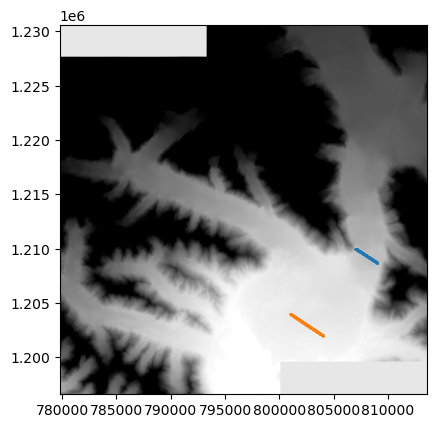

In [17]:
# Load IFSAR for reference plot
ifsar_fn = os.path.join(data_path, 'surface_elevation', 'ifsar_hubbardDEM.tif')
ifsar = xr.open_dataset(ifsar_fn)

# Load thickness anomalies
H_diff_fn = glob.glob(os.path.join(data_path, 'ice_thickness', '*anomaly*.nc'))[0]
H_diff = xr.open_dataset(H_diff_fn)

# Select gates to grab anomalies
from shapely.geometry import Polygon, LineString
xmin1, xmax1 = 807e3, 809e3
ymin1, ymax1 = 1.2087e6, 1.210e6
line1 = LineString([[xmin1, ymax1], [xmax1, ymin1]])
xmin2, xmax2 = 801e3, 804e3
ymin2, ymax2 = 1.202e6, 1.204e6
line2 = LineString([[xmin2, ymax2], [xmax2, ymin2]])

def redistribute_vertices(geom, distance):
    if geom.geom_type == 'LineString':
        num_vert = int(round(geom.length / distance))
        if num_vert == 0:
            num_vert = 1
        return LineString(
            [geom.interpolate(float(n) / num_vert, normalized=True)
             for n in range(num_vert + 1)])
    elif geom.geom_type == 'MultiLineString':
        parts = [redistribute_vertices(part, distance)
                 for part in geom]
        return type(geom)([p for p in parts if not p.is_empty])
    else:
        raise ValueError('unhandled geometry %s', (geom.geom_type,))
line1 = redistribute_vertices(line1, 30)
line2 = redistribute_vertices(line2, 30)

# plot
fig, ax = plt.subplots()
ax.imshow(ifsar.band_data.data[0], cmap='Greys', clim=(0,1500),
          extent=(np.min(ifsar.x.data), np.max(ifsar.x.data),
                  np.min(ifsar.y.data), np.max(ifsar.y.data)))
ax.plot(*line1.coords.xy, '.', markersize=2)
ax.plot(*line2.coords.xy, '.', markersize=2)
plt.show()

In [91]:
# Interpolate thickness anomalies along lines
H_diff_line1 = [H_diff.sel(x=x[0], y=x[1], method='nearest').thickness_diff_from_median.data 
                for x in zip(line1.coords.xy[0], line1.coords.xy[1])]
H_diff_line2 = [H_diff.sel(x=x[0], y=x[1], method='nearest').thickness_diff_from_median.data 
                for x in zip(line2.coords.xy[0], line2.coords.xy[1])]
H_diff_line1 = xr.where(np.abs(H_diff_line1) < 100, H_diff_line1, np.nan)
H_diff_line2 = xr.where(np.abs(H_diff_line2) < 100, H_diff_line2, np.nan)

# Compile in dataframes
df1 = pd.DataFrame({'Date': H_diff.time.data})
for i in range(0,len(H_diff_line1)):
    df1[f'point{i+1}'] = H_diff_line1[i]
df1.set_index('Date', inplace=True)
df1['mean'] = df1.mean(axis=1)
df2 = pd.DataFrame({'Date': H_diff.time.data})
for i in range(0,len(H_diff_line2)):
    df2[f'point{i+1}'] = H_diff_line2[i]
df2.set_index('Date', inplace=True)
df2['mean'] = df2.mean(axis=1)

# Merge dataframes
merged = pd.DataFrame(df1['mean']).merge(pd.DataFrame(df2['mean']), on='Date', suffixes=['_upglacier', '_downglacier'])
# Add month and DOY columns
merged['month'] = pd.DatetimeIndex(merged.index).month
merged['DOY'] = pd.DatetimeIndex(merged.index).dayofyear
# Add season column
# merged['season'] = 'winter'
# merged['seasonN'] = 0
# merged.loc[(merged['month'] > 3) & (merged['month'] <=6), 'season'] = 'spring'
# merged.loc[merged['season']=='spring', 'seasonN'] = 1
# merged.loc[(merged['month'] > 6) & (merged['month'] <=9), 'season'] = 'summer'
# merged.loc[merged['season']=='summer', 'seasonN'] = 2
# merged.loc[(merged['month'] > 9) & (merged['month'] <=12), 'season'] = 'fall'
# merged.loc[merged['season']=='fall', 'seasonN'] = 3
# merged.sort_values(by='seasonN', inplace=True)

merged

/var/folders/9h/sg2rw9f10lq5jmfch9hnj6gc0000gq/T/ipykernel_12916/3995211862.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[f'point{i+1}'] = H_diff_line2[i]
/var/folders/9h/sg2rw9f10lq5jmfch9hnj6gc0000gq/T/ipykernel_12916/3995211862.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[f'point{i+1}'] = H_diff_line2[i]
/var/folders/9h/sg2rw9f10lq5jmfch9hnj6gc0000gq/T/ipykernel_12916/3995211862.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

,mean_upglacier,mean_downglacier,month,DOY
Date,,,,
2012-05-24,0.577450,5.271799,5,145
2013-05-21,-1.509543,5.211386,5,141
2012-03-21,1.250884,6.340494,3,81
2014-05-17,2.607501,1.066293,5,137
2015-05-19,0.323425,0.056927,5,139
2016-05-15,-0.098929,-3.608752,5,136
2018-05-23,2.005166,1.197593,5,143
2019-09-28,6.948220,0.298372,9,271
2020-06-05,-0.439525,5.174039,6,157


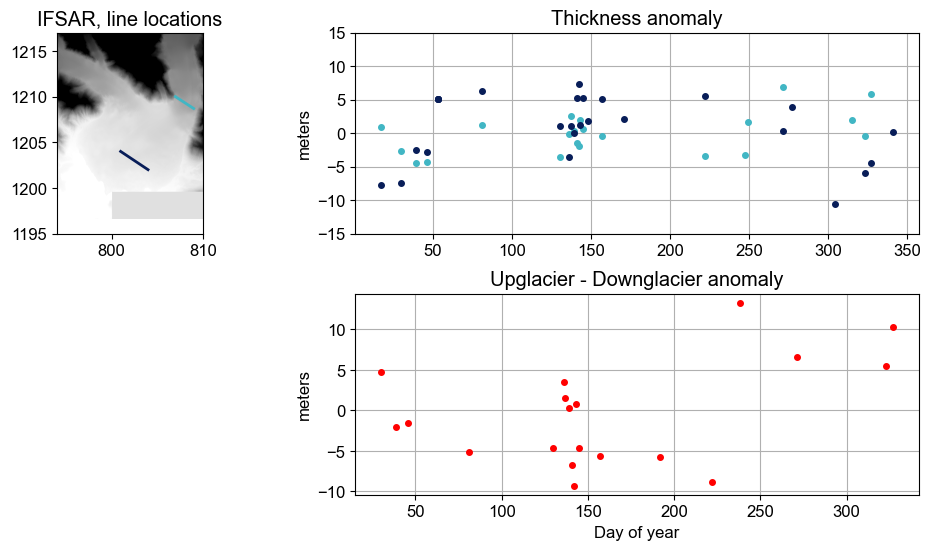

In [108]:
# -----Plot
plt.rcParams.update({'font.sans-serif': 'Arial', 'font.size': 12})
fig, ax = plt.subplots(2, 2, figsize=(12,6), gridspec_kw={'width_ratios': [1, 2]})
ax = ax.flatten()
# IFSAR, segments map
ax[0].imshow(ifsar.band_data.data[0], cmap='Greys', clim=(0,1200), 
             extent=(np.min(ifsar.x.data)/1e3, np.max(ifsar.x.data)/1e3,
                     np.min(ifsar.y.data)/1e3, np.max(ifsar.y.data)/1e3))
ax[0].plot(np.divide(line1.coords.xy[0], 1e3), np.divide(line1.coords.xy[1], 1e3),
           '-', color='#41b6c4', linewidth=2)
ax[0].plot(np.divide(line2.coords.xy[0], 1e3), np.divide(line2.coords.xy[1], 1e3),
           '-', color='#081d58', linewidth=2)
# ax[0].set_xticks([])
# ax[0].set_yticks([])
ax[0].set_xlim((794, 810))
ax[0].set_ylim(1195, 1217)
ax[0].set_title('IFSAR, line locations')
# H anomaly time series
ax[1].plot(merged['DOY'], merged['mean_upglacier'], '.', color='#41b6c4', markersize=8)
ax[1].plot(merged['DOY'], merged['mean_downglacier'], '.', color='#081d58', markersize=8)
ax[1].set_ylim(-15, 15)
ax[1].set_ylabel('meters')
ax[1].grid()
ax[1].set_title('Thickness anomaly')
# Upglacier - Downglacier anomaly 
ax[3].plot(merged['DOY'], merged['mean_upglacier'] - merged['mean_downglacier'], '.r', markersize=8)
# ax[3].set_ylim(-15, 15)
ax[3].set_xlabel('Day of year')
ax[3].set_ylabel('meters')
ax[3].grid()
ax[3].set_title('Upglacier - Downglacier anomaly')
# years = H_diff.time.data.astype('datetime64[Y]')
# for year in years:
#     summer_start = np.datetime64(str(year) + '-06-22')
#     summer_end = np.datetime64(str(year) + '-09-22')
#     spatch = ax[1].add_patch(Rectangle((summer_start, -20), width=(summer_end-summer_start), height=40, facecolor='#fff5eb', edgecolor='None'))
#     winter_start = np.datetime64(str(year) + '-12-22')
#     winter_end = np.datetime64(str(year+1) + '-03-22')
#     wpatch = ax[1].add_patch(Rectangle((winter_start, -20), width=(winter_end-winter_start), height=40, facecolor='#f0f0f0', edgecolor='None'))
# ax[1].legend([spatch, wpatch], ['summer', 'winter'], loc='lower right', framealpha=1)

# Merge thickness anomalies, add month and season columns

# Boxplots for monthly upglacier-downglacier
# bp = sns.boxplot(data=merged, x='season', y='mean_upglacier-mean_downglacier', hue='season', palette='Set2', ax=ax[2])
# ax[2].set_title('Upglacier - Downglacier\nThickness Anomaly')
# ax[2].set_ylabel('')
# # Add number of observations
# medians = merged.groupby(['seasonN'])['mean_upglacier-mean_downglacier'].median()
# nobs = merged['season'].value_counts().values
# nobs = [str(x) for x in nobs.tolist()]
# nobs = ["N = " + i for i in nobs]
# pos = range(len(nobs))
# for tick,label in zip(pos, ax[2].get_xticklabels()):
#     ax[2].text(pos[tick],
#             medians[tick] + 0.1,
#             nobs[tick],
#             horizontalalignment='center',
#             size='small',
#             color='w',
#             weight='semibold')

ax[2].remove()
fig.subplots_adjust(hspace=0.3)
plt.show()

# # save figure
# fig_fn = os.path.join(figures_out_path, 'thickness_anomaly_segments.png')
# fig.savefig(fig_fn, dpi=250, bbox_inches='tight')
# print('Figure saved to file:', fig_fn)

In [105]:
line1.coords.xy[0]

array('d', [807000.0, 807025.0, 807050.0, 807075.0, 807100.0, 807125.0, 807150.0, 807175.0, 807200.0, 807225.0, 807250.0, 807275.0, 807300.0, 807325.0, 807350.0, 807375.0, 807400.0, 807425.0, 807450.0, 807475.0, 807500.0, 807525.0, 807550.0, 807575.0, 807600.0, 807625.0, 807650.0, 807675.0, 807700.0, 807725.0, 807750.0, 807775.0, 807800.0, 807825.0, 807850.0, 807875.0, 807900.0, 807925.0, 807950.0, 807975.0, 808000.0, 808025.0, 808050.0, 808075.0, 808100.0, 808125.0, 808150.0, 808175.0, 808200.0, 808225.0, 808250.0, 808275.0, 808300.0, 808325.0, 808350.0, 808375.0, 808400.0, 808425.0, 808450.0, 808475.0, 808500.0, 808525.0, 808550.0, 808575.0, 808600.0, 808625.0, 808650.0, 808675.0, 808700.0, 808725.0, 808750.0, 808775.0, 808800.0, 808825.0, 808850.0, 808875.0, 808900.0, 808925.0, 808950.0, 808975.0, 809000.0])